In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

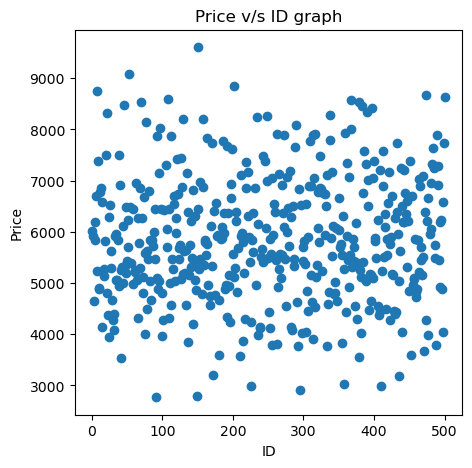

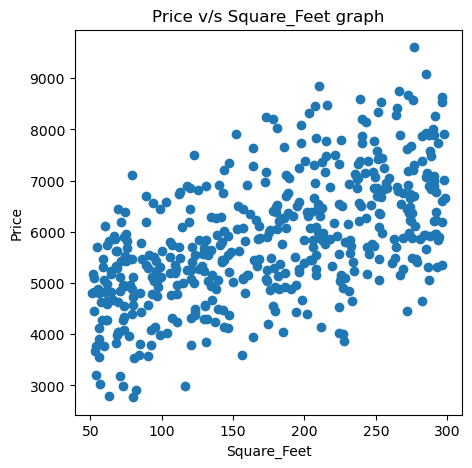

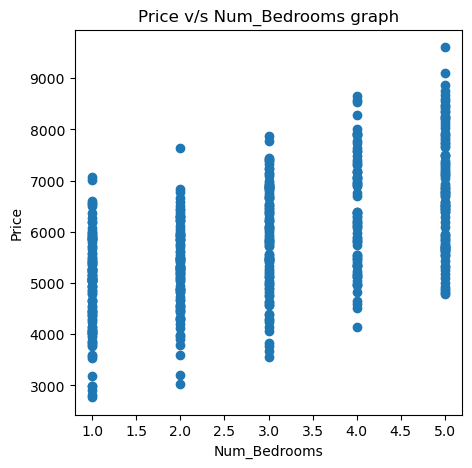

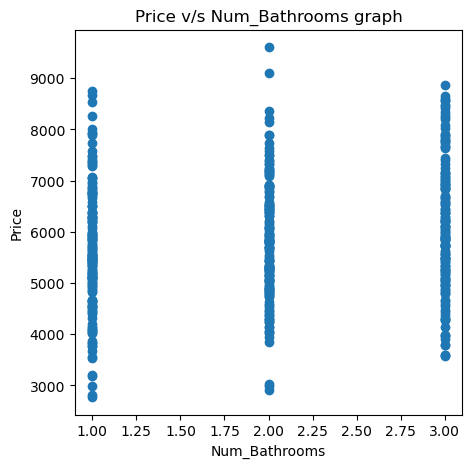

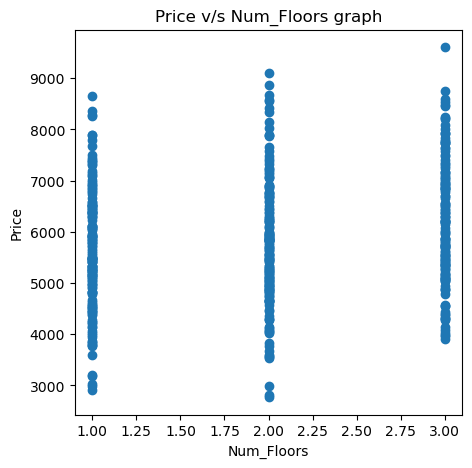

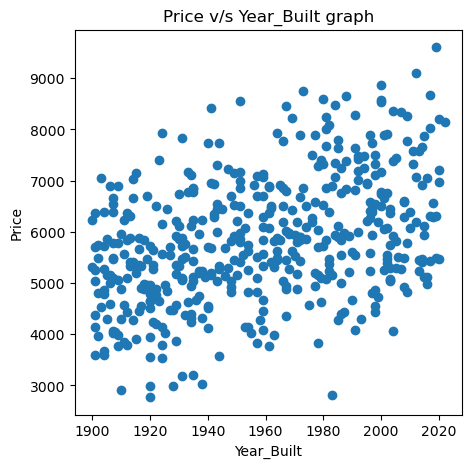

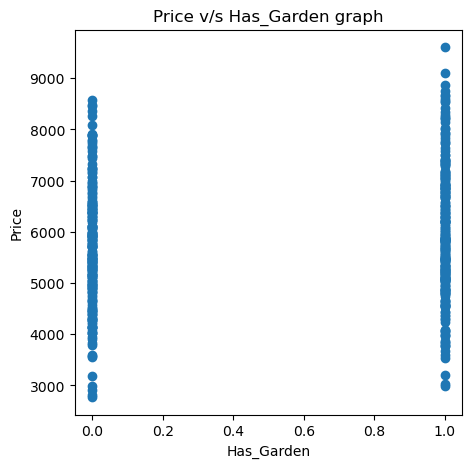

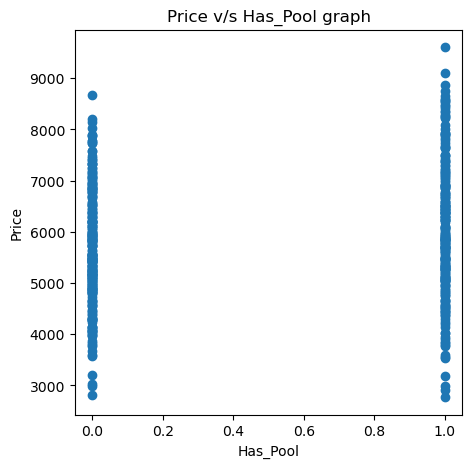

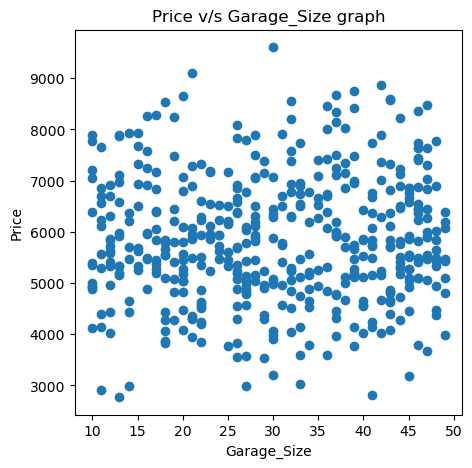

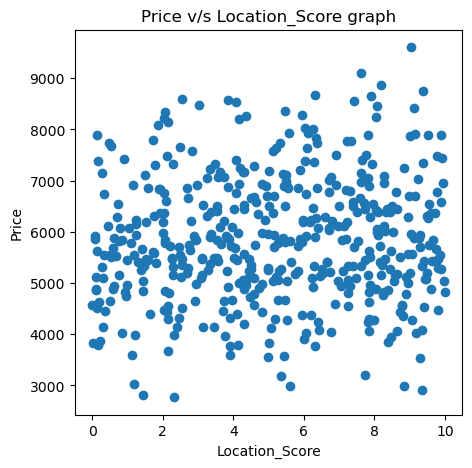

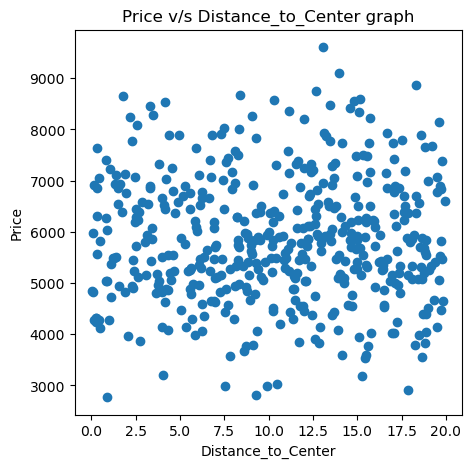

In [203]:
df = pd.read_csv("data (2).csv")
df = df.dropna()

for column in df.columns:
    if column != 'Price':
        plt.figure(figsize=(5,5))
        plt.scatter(df[column],df['Price'])
        plt.title("Price v/s " + str(column) + " graph")
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()

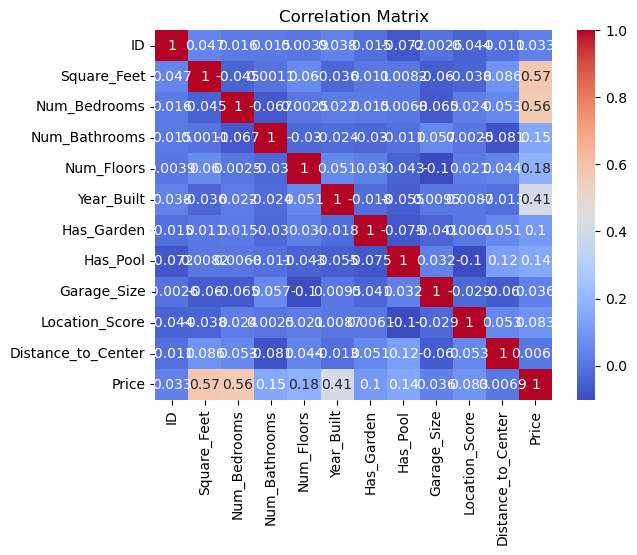

In [204]:
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [205]:
##### Most influential factors on price are Square_Feet, Num_Bedrooms and year_Built

In [206]:
x = df[['Square_Feet','Num_Bedrooms','Year_Built']].values
y = df['Price'].values.reshape(-1,1)

Xtrain, Xtest, Ytrain, Ytest = [],[],[],[]

In [207]:
##### Optional Task (Standardization by using x = (x - xmean) / xstd
Xmean = np.mean(x)
Xstd = np.std(x)
X = (x - Xmean)/ Xstd
Ymean = np.mean(y)
Ystd = np.std(y)
Y = (y - Ymean)/ Ystd

In [208]:
index = np.arange(len(Y))
splitindex = 0.80 * len(Y)
np.random.shuffle(index)

for ite in range(len(Y)):
    if ite < splitindex:
        Xtrain.append(X[index[ite]])
        Ytrain.append(Y[index[ite]])
    else:
        Xtest.append(X[index[ite]])
        Ytest.append(Y[index[ite]])

Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)

Xtrain_bias = np.hstack((np.ones((len(Xtrain),1)),Xtrain))
Xtest_bias = np.hstack((np.ones((len(Xtest),1)),Xtest))

XTX = np.dot(Xtrain_bias.T, Xtrain_bias)
XTXi = np.linalg.inv(XTX)
XTY = np.dot(Xtrain_bias.T,Ytrain)
weight_matrix = np.dot(XTXi,XTY)

Y_predicted = np.dot(Xtest_bias,weight_matrix)

In [209]:
Y_diff = Ytest - Y_predicted
MSE = np.mean(Y_diff ** 2)
RSS = MSE * len(Ytest)

print(MSE)
print(RSS)

0.13226835324161118
12.433225204711452


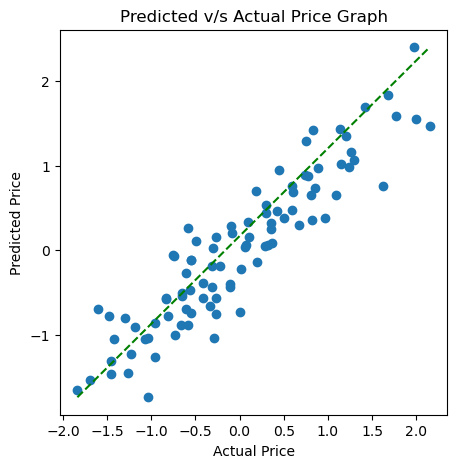

In [210]:
plt.figure(figsize=(5,5))
plt.title("Predicted v/s Actual Price Graph")
plt.scatter(Ytest, Y_predicted)
plt.plot([min(Ytest),max(Ytest)],[min(Y_predicted),max(Y_predicted)], linestyle = "--", color = "green", label = "Ideal Condition")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

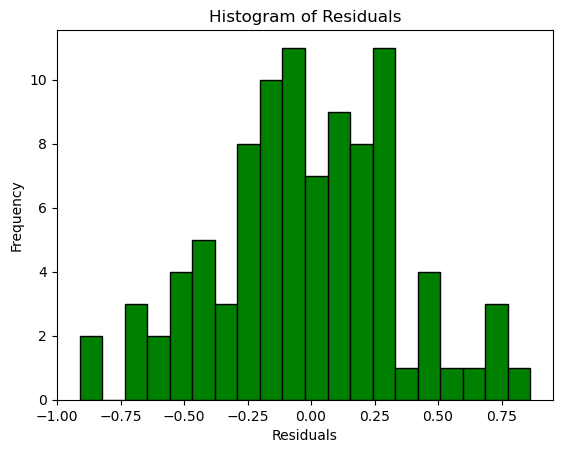

In [211]:
plt.hist(Y_diff, bins=20, color = 'green', edgecolor = 'black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [212]:
##### Optional Task (Polynomial regression)